In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats


In [5]:
df = pd.read_csv("../data/raw/laptop_price - dataset.csv")

In [ ]:
df.info()

In [ ]:
df.columns

In [7]:
df.rename(columns={'CPU_Company':'CPUCompany', 'CPU_Type':'CPUType', 'CPU_Frequency (GHz)': 'CPUFrequency', 'RAM (GB)':'RAM', 
       'GPU_Company':'GPUCompany', 'GPU_Type':'GPUType', 'Weight (kg)':'Weight', 'Price (Euro)':'Price'}, inplace=True)


In [20]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPUCompany', 'CPUType', 'CPUFrequency', 'RAM', 'Memory', 'GPUCompany',
       'GPUType', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
var_num = df.select_dtypes(include=['float64', 'int']).columns
var_cat = df.select_dtypes(include=['object', 'category']).columns

print(var_num)
print(var_cat)

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df[var_num].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
sns.boxplot(x='OpSys', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

In [ ]:
columName = 'CPUType'
df_encoded = pd.get_dummies(df, columns=[columName], drop_first=True)
df_encoded.head()


In [ ]:
# Seleccionar columnas que comiencen con "Company_"
df_filtered = df_encoded.filter(like=columName+"_", axis=1)
df_filtered.head()



In [ ]:
df_filtered = pd.concat([df[['Price']], df_filtered], axis=1)
df_encoded = df_filtered.astype(int)
df_encoded.head()

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()



In [ ]:
df_encoded['Company_Apple'] = df_encoded['Company_Apple'].astype(int)

In [19]:
df_encoded.columns

NameError: name 'df_encoded' is not defined

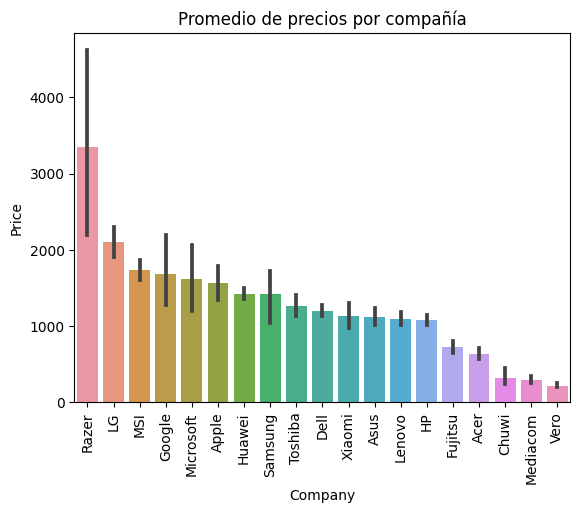

In [ ]:
orden = df.groupby('Company')['Price'].mean().sort_values(ascending=False).index
sns.barplot(x='Company', y='Price', data=df, estimator='mean', order=orden)  # Por defecto muestra la media
plt.xticks(rotation=90)
plt.title("Promedio de precios por compañía")
plt.show()


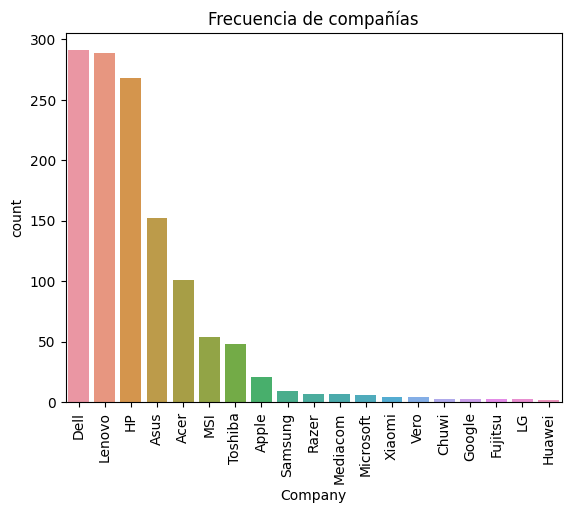

In [ ]:
orden = df['Company'].value_counts().index
sns.countplot(x='Company', data=df, order=orden)
plt.xticks(rotation=90)
plt.title("Frecuencia de compañías")
plt.show()

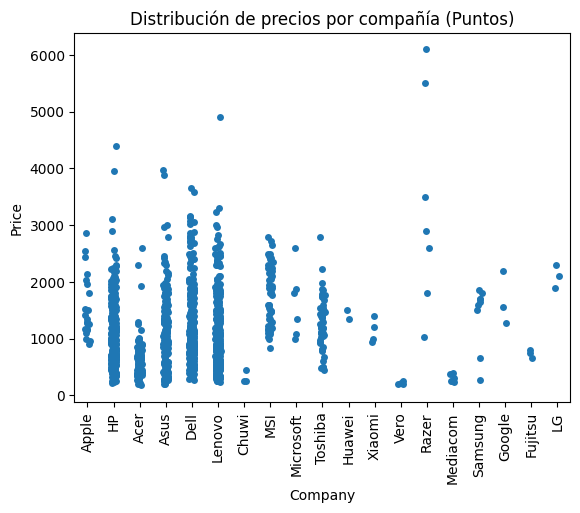

In [10]:
sns.stripplot(x='Company', y='Price', data=df, jitter=True)
plt.xticks(rotation=90)
plt.title("Distribución de precios por compañía (Puntos)")
plt.show()


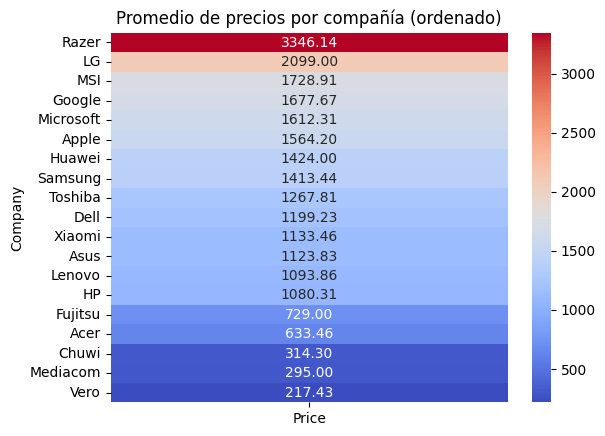

In [18]:
# Crear tabla dinámica y ordenar por el promedio de precios
pivot = df.pivot_table(index='Company', values='Price', aggfunc='mean')
pivot = pivot.sort_values('Price', ascending=False)

# Gráfico heatmap con categorías ordenadas
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Promedio de precios por compañía (ordenado)")
plt.show()



<Axes: title={'center': 'Distribución de fabricantes'}, xlabel='Company'>

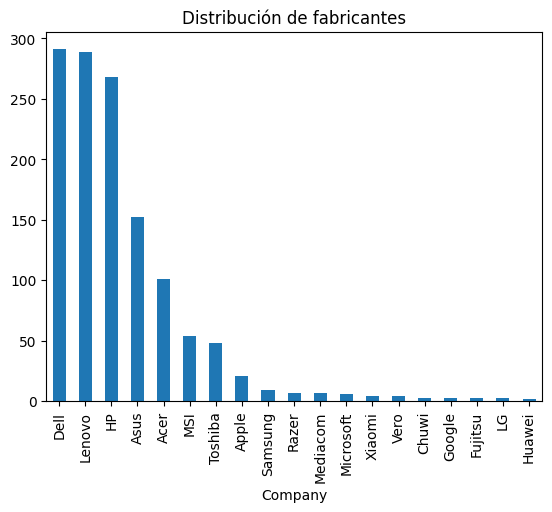

In [21]:
df['Company'].value_counts().plot(kind='bar', title='Distribución de fabricantes')


<Axes: xlabel='Weight', ylabel='Price'>

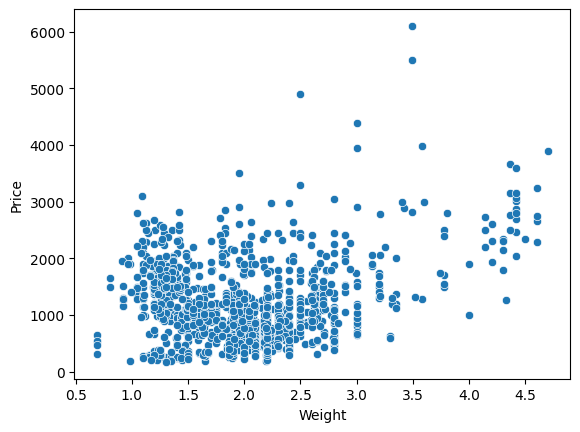

In [22]:
sns.scatterplot(x='Weight', y='Price', data=df)


<Axes: xlabel='Weight', ylabel='Price'>

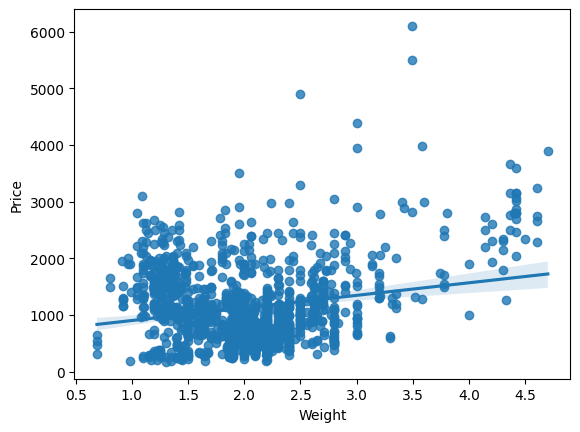

In [23]:
sns.regplot(x='Weight', y='Price', data=df)


<Axes: >

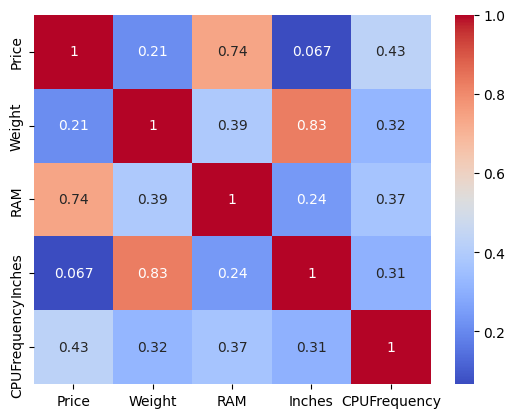

In [24]:
sns.heatmap(df[['Price', 'Weight', 'RAM', 'Inches', 'CPUFrequency']].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='TypeName', ylabel='Price'>

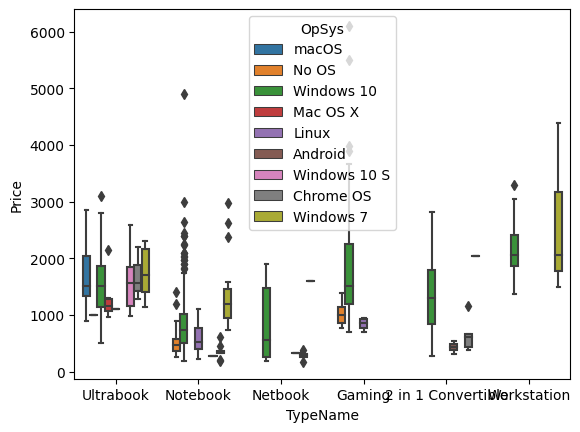

In [25]:
sns.boxplot(x='TypeName', y='Price', hue='OpSys', data=df)


<Axes: xlabel='Price'>

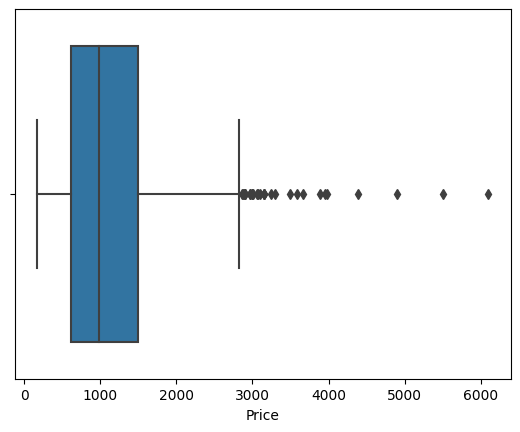

In [26]:
sns.boxplot(x=df['Price'])


<Axes: xlabel='Inches', ylabel='Price'>

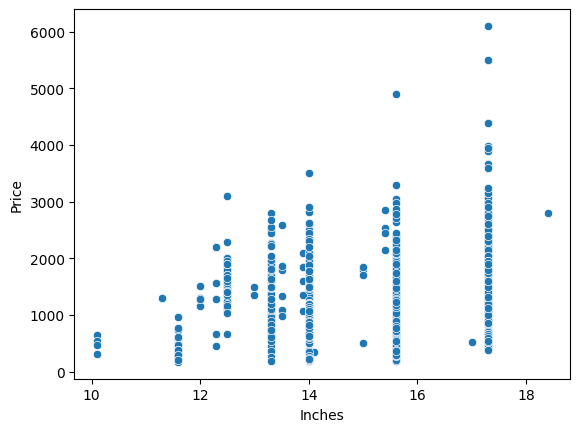

In [27]:
sns.scatterplot(x='Inches', y='Price', data=df)


<Axes: xlabel='CPUCompany', ylabel='Price'>

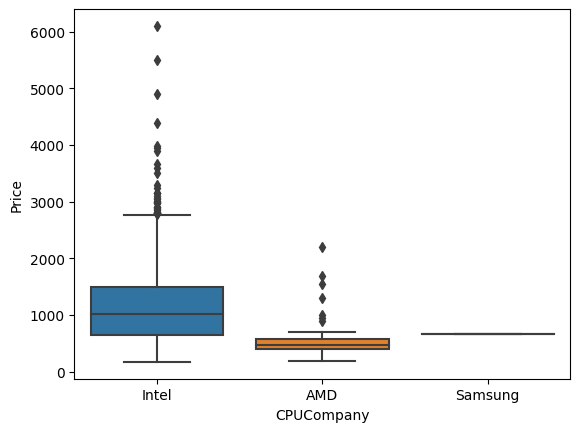

In [28]:
sns.boxplot(x='CPUCompany', y='Price', data=df)


<Axes: xlabel='RAM', ylabel='Price'>

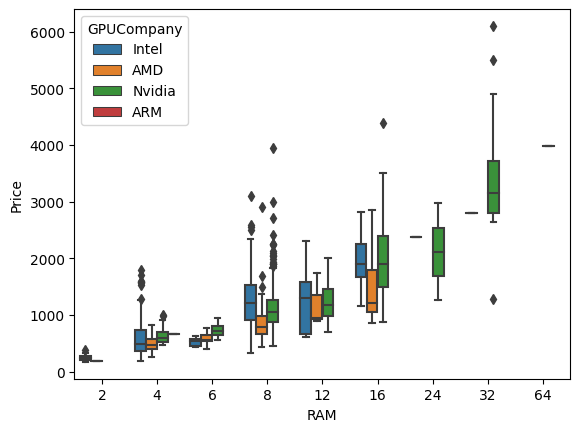

In [29]:
sns.boxplot(x='RAM', y='Price', hue='GPUCompany', data=df)


<Axes: xlabel='CPUType'>

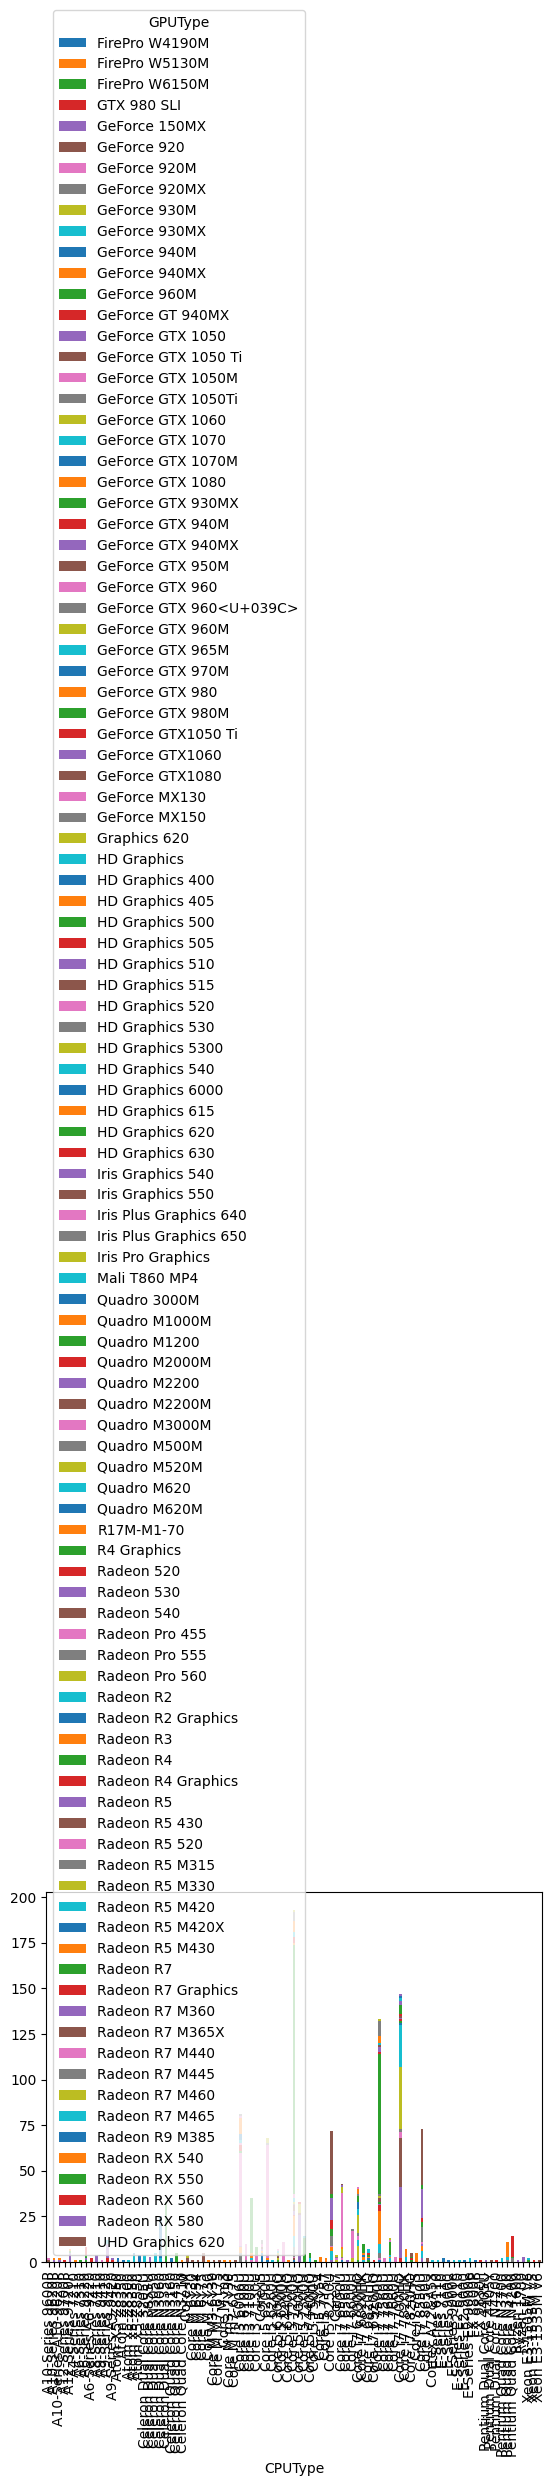

In [30]:
df.groupby(['CPUType', 'GPUType']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='OpSys', ylabel='count'>

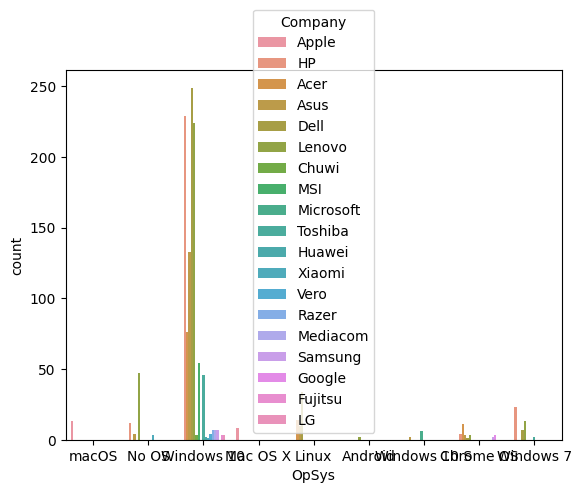

In [31]:
sns.countplot(x='OpSys', hue='Company', data=df)


<Axes: xlabel='Company'>

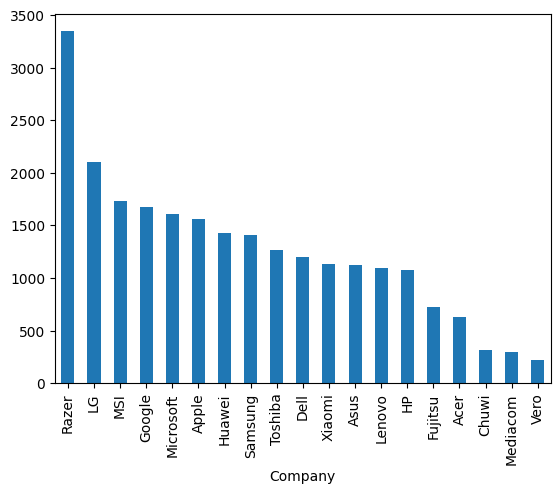

In [32]:
df.groupby('Company')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
